In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
test_1_img = cv.imread("report/images/Test1.png",cv.COLOR_BGR2GRAY)
test_1_noise_1_img = cv.imread("report/images/Test1Noise1.png",cv.COLOR_BGR2GRAY)
test_1_noise_2_img = cv.imread("report/images/Test1Noise2.png",cv.COLOR_BGR2GRAY)
test_2_img = cv.imread("report/images/Test2.png",cv.COLOR_BGR2GRAY)
test_2_noise_2_img = cv.imread("report/images/Test2Noise2.png",cv.COLOR_BGR2GRAY)

In [3]:
def calc_mse(img1, img2):
    rows1, cols1, _ = img1.shape
    rows2, cols2, _ = img2.shape
    if rows1 != rows2:
        print("img diff row #")
    if cols1 != cols2:
        print("img diff col #")

    pix_count = rows1 * cols1
    run_sum = 0
    for y in range(rows1):
        for x in range(cols1):
            diff = pow(int(img1[y, x, 0]) - int(img2[y, x, 0]), 2)
            run_sum += diff

    print(run_sum / pix_count)

In [4]:
def save_img(img, path):
    res = cv.imwrite(path, img)
    if not res:
        return False
    return True

In [5]:
def show_img(img):
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('yellow')
    img_plot = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img_plot)
    plt.axis("off")
    plt.show()

Not processed


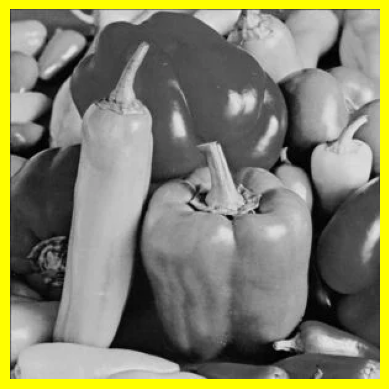

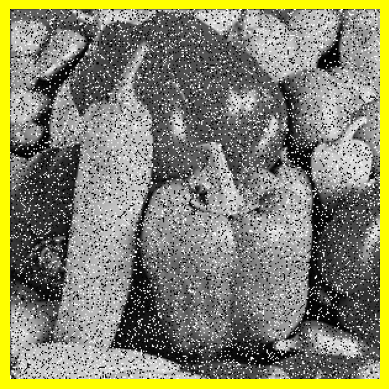

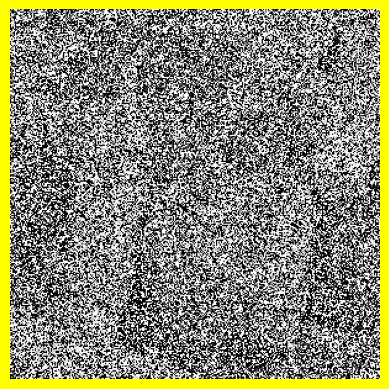

3984.7870444444443
15838.201977777779
Gaussian Filter sigma = 2


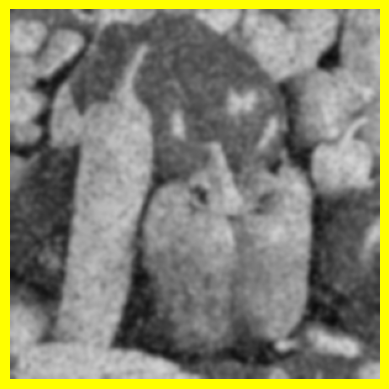

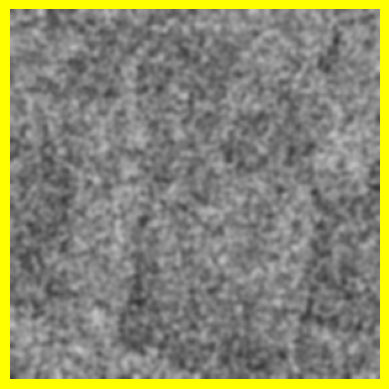

439.8274777777778
2657.9681555555558
Gaussian Filter sigma = 7


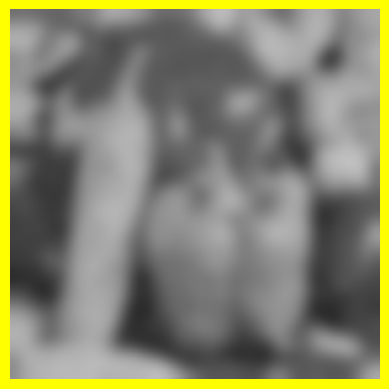

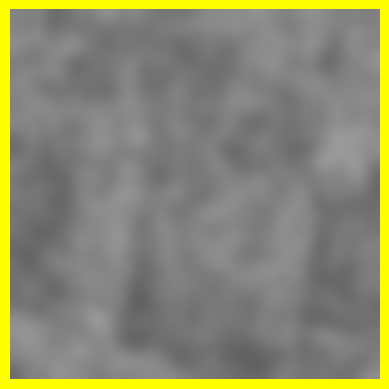

1057.0056
2700.6626
Median Filter 7x7


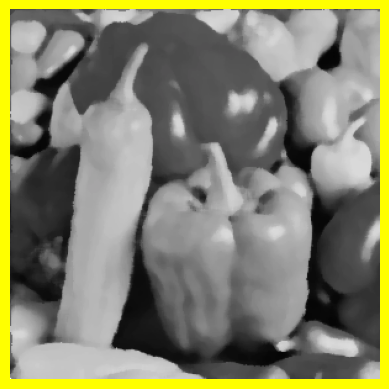

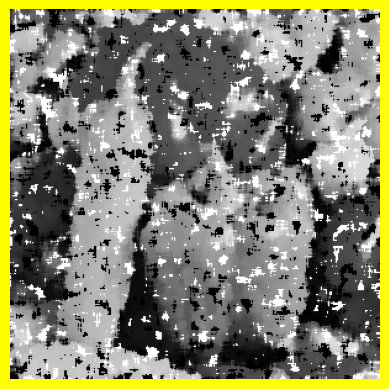

129.62436666666667
3569.880688888889
Median Filter 19x19


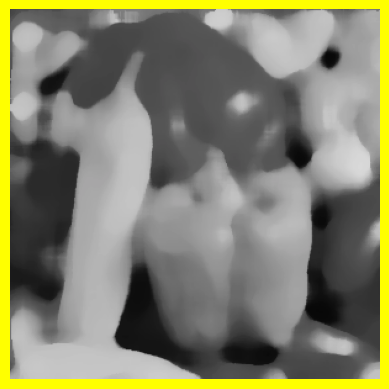

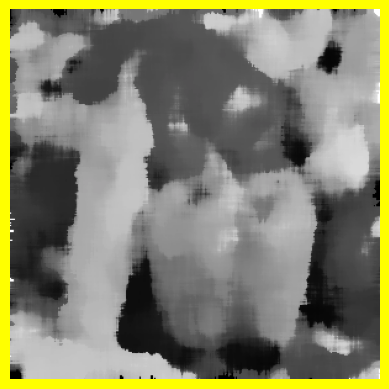

576.5919888888889
990.4110888888889


In [27]:
print("Not processed")
show_img(test_1_img)
show_img(test_1_noise_1_img)
show_img(test_1_noise_2_img)
calc_mse(test_1_noise_1_img, test_1_img)
calc_mse(test_1_noise_2_img, test_1_img)

print("Gaussian Filter sigma = 2")
test_1_noise_1_blur_2_img = cv.GaussianBlur(test_1_noise_1_img, None, 2)
test_1_noise_2_blur_2_img = cv.GaussianBlur(test_1_noise_2_img, None, 2)
show_img(test_1_noise_1_blur_2_img)
show_img(test_1_noise_2_blur_2_img)
save_img(test_1_noise_1_blur_2_img, "report/images/test_1_noise_1_blur_2_img.png")
save_img(test_1_noise_2_blur_2_img, "report/images/test_1_noise_2_blur_2_img.png")
calc_mse(test_1_noise_1_blur_2_img, test_1_img)
calc_mse(test_1_noise_2_blur_2_img, test_1_img)

print("Gaussian Filter sigma = 7")
test_1_noise_1_blur_7_img = cv.GaussianBlur(test_1_noise_1_img, None, 7)
test_1_noise_2_blur_7_img = cv.GaussianBlur(test_1_noise_2_img, None, 7)
show_img(test_1_noise_1_blur_7_img)
show_img(test_1_noise_2_blur_7_img)
save_img(test_1_noise_1_blur_2_img, "report/images/test_1_noise_1_blur_7_img.png")
save_img(test_1_noise_2_blur_2_img, "report/images/test_1_noise_2_blur_7_img.png")
calc_mse(test_1_noise_1_blur_7_img, test_1_img)
calc_mse(test_1_noise_2_blur_7_img, test_1_img)

print("Median Filter 7x7")
test_1_noise_1_median_7_img = cv.medianBlur(test_1_noise_1_img, ksize=7) 
test_1_noise_2_median_7_img = cv.medianBlur(test_1_noise_2_img, ksize=7)
show_img(test_1_noise_1_median_7_img)
show_img(test_1_noise_2_median_7_img)
save_img(test_1_noise_1_blur_2_img, "report/images/test_1_noise_1_median_7_img.png")
save_img(test_1_noise_2_blur_2_img, "report/images/test_1_noise_2_median_7_img.png")
calc_mse(test_1_noise_1_median_7_img, test_1_img)
calc_mse(test_1_noise_2_median_7_img, test_1_img)

print("Median Filter 19x19")
test_1_noise_1_median_19_img = cv.medianBlur(test_1_noise_1_img, ksize=19) 
test_1_noise_2_median_19_img = cv.medianBlur(test_1_noise_2_img, ksize=19)
show_img(test_1_noise_1_median_19_img)
show_img(test_1_noise_2_median_19_img)
save_img(test_1_noise_1_blur_2_img, "report/images/test_1_noise_1_median_19_img.png")
save_img(test_1_noise_2_blur_2_img, "report/images/test_1_noise_2_median_19_img.png")
calc_mse(test_1_noise_1_median_19_img, test_1_img)
calc_mse(test_1_noise_2_median_19_img, test_1_img)

In [23]:
def adaptive_median_filter(img, smin, smax):
    start_time = datetime.now()
    rows, cols, _ = img.shape
    output = img.copy()
    
    size_counts = {}
    for s in range(smin, smax+1, 2):
        size_counts[s] = 0
    
    for y in range(int(smax/2), rows - int(smax/2)):
        for x in range(int(smax/2), cols - int(smax/2)):
            s = smin
            finalized = False
            while s <= smax:
                scen = int(s/2)
                zxy = img[y,x,0]
                sxy = img[int(y-scen):int(y+scen+1), int(x-scen):int(x+scen+1), 0]
                zmin = np.min(sxy)
                zmax = np.max(sxy)
                zmed = np.median(sxy)
                if zmed > zmin and zmax > zmed:
                    if zxy > zmin and zmax > zxy:
                        output[y,x] = zxy
                    else:
                        output[y,x] = zmed
                    size_counts[s] += 1
                    finalized = True
                    break
                else:
                    s = s + 2
            if not finalized:
                output[y,x] = zmed
                if smax in size_counts:
                    size_counts[smax] += 1

    end_time = datetime.now()
    total_time = end_time - start_time
    
    sizes = sorted(size_counts.keys())
    counts = [size_counts[s] for s in sizes]
    
    plt.figure(figsize=(10, 6))
    plt.bar(sizes, counts, width=1.5, edgecolor='black', alpha=0.7)
    plt.xlabel('Filter Size (window size)', fontsize=12)
    plt.ylabel('Number of Pixels Finalized', fontsize=12)
    plt.title('Distribution of Pixels Reconstructed at Each Filter Size', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(sizes)
    plt.tight_layout()
    
    return output, total_time, plt.gcf()

test_1_noise_2_adaptive_7
0:00:02.279799
2409.1617333333334
None


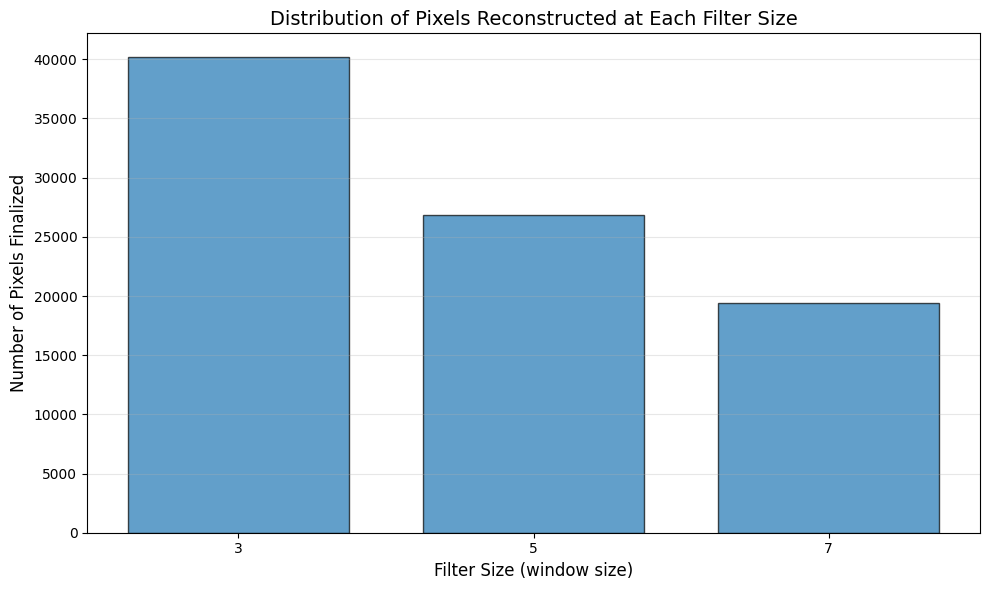

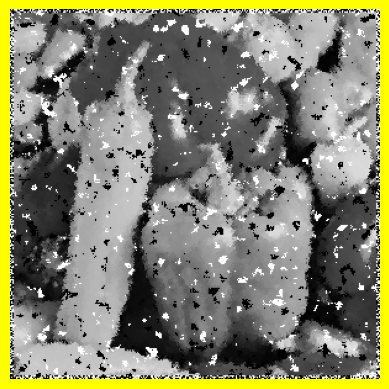

test_1_noise_2_adaptive_19
0:00:02.871142
2192.0101
None


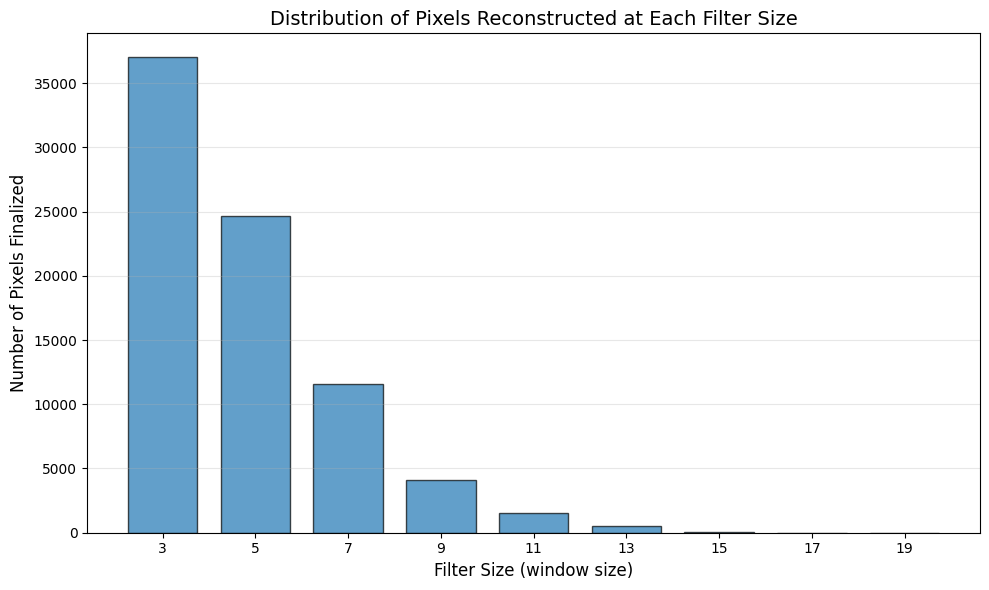

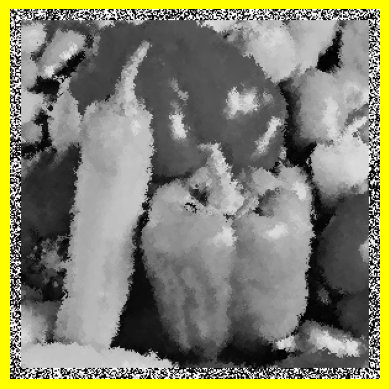

test_2_noise_2_adaptive_7
0:00:25.943920
2436.0966859562204
None


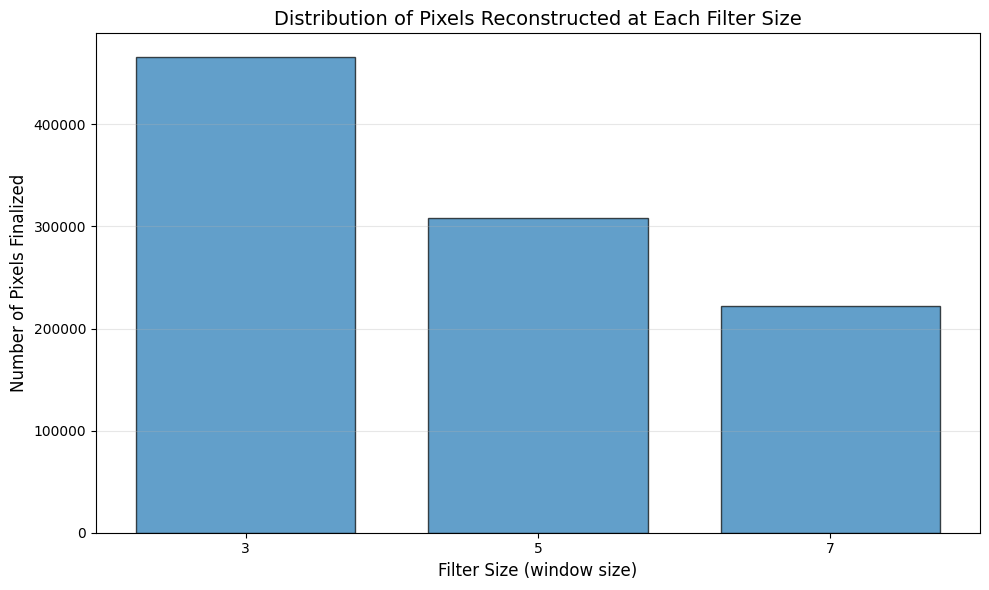

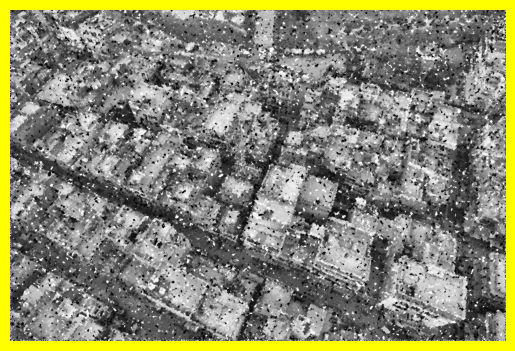

test_2_noise_2_adaptive_19
0:00:27.656820
1426.7568297210432
None


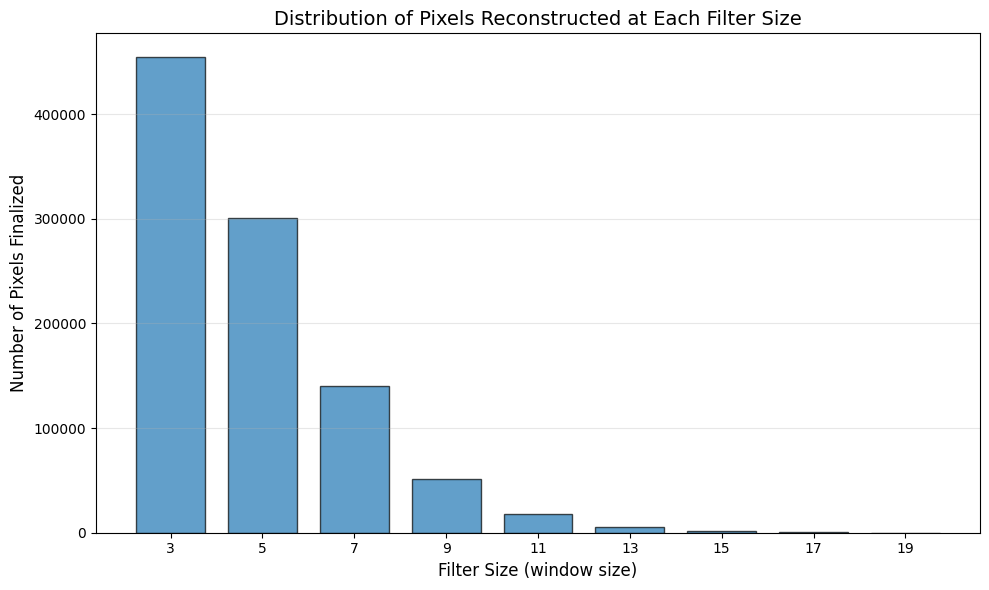

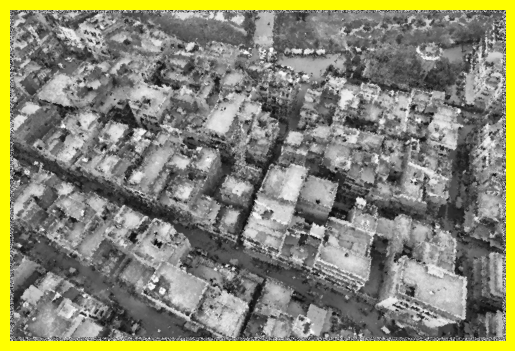

In [25]:
print("test_1_noise_2_adaptive_7")
test_1_noise_2_adaptive_7_img, processing_time, plot = adaptive_median_filter(test_1_noise_2_img, 3, 7)
plot.savefig("report/images/test_1_noise_2_adaptive_7_plot.png")
save_img(test_1_noise_2_adaptive_7_img, "report/images/test_1_noise_2_adaptive_7_img.png")
print(processing_time)
calc_mse(test_1_img, test_1_noise_2_adaptive_7_img)
show_img(test_1_noise_2_adaptive_7_img)

print("test_1_noise_2_adaptive_19")
test_1_noise_2_adaptive_19_img, processing_time, plot = adaptive_median_filter(test_1_noise_2_img, 3, 19)
plot.savefig("report/images/test_1_noise_2_adaptive_19_plot.png")
save_img(test_1_noise_2_adaptive_19_img, "report/images/test_1_noise_2_adaptive_19_img.png")
print(processing_time)
calc_mse(test_1_img, test_1_noise_2_adaptive_19_img)
show_img(test_1_noise_2_adaptive_19_img)

print("test_2_noise_2_adaptive_7")
test_2_noise_2_adaptive_7_img, processing_time, plot = adaptive_median_filter(test_2_noise_2_img, 3, 7)
plot.savefig("report/images/test_2_noise_2_adaptive_7_plot.png")
save_img(test_2_noise_2_adaptive_7_img, "report/images/test_2_noise_2_adaptive_7_img.png")
print(processing_time)
calc_mse(test_2_img, test_2_noise_2_adaptive_7_img)
show_img(test_2_noise_2_adaptive_7_img)

print("test_2_noise_2_adaptive_19")
test_2_noise_2_adaptive_19_img, processing_time, plot = adaptive_median_filter(test_2_noise_2_img, 3, 19)
plot.savefig("report/images/test_2_noise_2_adaptive_19_plot.png")
save_img(test_2_noise_2_adaptive_19_img, "report/images/test_2_noise_2_adaptive_19_img.png")
print(processing_time)
calc_mse(test_2_img, test_2_noise_2_adaptive_19_img)
show_img(test_2_noise_2_adaptive_19_img)